In [4]:
## Importing required packages
import pandas as pd 
import numpy as np 
import missingno as miss
import matplotlib.pyplot as plt


# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

import seaborn as sns

In [5]:
##Let us import all the processed data
SP1 = pd.read_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Project Part -1/Processed data - part 1/SP1_output.csv")
SP2 = pd.read_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Project Part -1/Processed data - part 1/SP2-output.csv")
SP3 = pd.read_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Project Part -1/Processed data - part 1/SP3_output.csv")
SP5 = pd.read_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Project Part -1/Processed data - part 1/SP5-output.csv")
SP6 = pd.read_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Project Part -1/Processed data - part 1/SP6-output.csv")
SP7 = pd.read_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Project Part -1/Processed data - part 1/SP7-output.csv")

In [6]:

## Let us explore the data
SP1.head() 

,country,Urban_GG_Emissions
0,Australia,35825513
1,Austria,4065351
2,Belarus,4898939
3,Belgium,9557424
4,Bulgaria,3539432


In [7]:
SP1.shape


(40, 2)

In [8]:
SP2.head()

,country,illiterate_people_in_2018
0,Afghanistan,2791022.0
1,Aland Islands,NaN
2,Albania,3076.0
3,Algeria,156217.0
4,American Samoa,NaN


In [9]:
SP2.shape

(280, 2)

In [10]:
SP3.head()

,country,msw_year
0,Afghanistan,2313148.55
1,Albania,58955.00
2,Algeria,1397874.00
3,American Samoa,0.00
4,Angola,1316336.00


In [11]:
SP3.shape

(164, 2)

In [12]:
SP5.head()

,country,Avg Social index of country
0,Argentina,67.919178
1,Australia,84.784300
2,Austria,86.491939
3,Belgium,76.022053
4,Brazil,59.662550


In [13]:
SP5.dtypes

country                         object
Avg Social index of country    float64
dtype: object

In [14]:
SP6.head()

,country,Avg infra index of country
0,Argentina,72.211915
1,Australia,81.321589
2,Austria,88.941182
3,Belgium,85.296136
4,Brazil,60.419998


In [15]:
SP6.shape

(44, 2)

In [16]:
SP7.head()

,country,Avg Urban Gov index of country
0,Argentina,79.390000
1,Australia,93.230000
2,Austria,75.000000
3,Belgium,89.370000
4,Brazil,84.229151


In [17]:
SP7.shape

(47, 2)

As we can see, SP1 dataset is too small. So let us hold it for the time being and create a combined dataframe using the rest of the data. 

In [18]:
## Merging SP2,SP3,SP5,SP6,SP7

merged_1 = pd.merge(SP2, SP3, on='country', how='inner')
merged_1.head() 

,country,illiterate_people_in_2018,msw_year
0,Afghanistan,2791022.0,2313148.55
1,Albania,3076.0,58955.00
2,Algeria,156217.0,1397874.00
3,American Samoa,NaN,0.00
4,Angola,NaN,1316336.00


In [19]:
merged_2 = pd.merge(SP1, SP5, on='country', how='inner')
merged_2.head() 

,country,Urban_GG_Emissions,Avg Social index of country
0,Australia,35825513,84.784300
1,Austria,4065351,86.491939
2,Belgium,9557424,76.022053
3,Canada,46462147,87.407489
4,Denmark,3184115,87.338307


In [20]:
merged_3 = pd.merge(merged_1, merged_2, on='country', how='inner')
merged_3.head() 

,country,illiterate_people_in_2018,msw_year,Urban_GG_Emissions,Avg Social index of country
0,Australia,NaN,350000.0,35825513,84.784300
1,Austria,NaN,1036879.0,4065351,86.491939
2,Belgium,NaN,994859.0,9557424,76.022053
3,Canada,NaN,2177219.0,46462147,87.407489
4,Denmark,NaN,233805.0,3184115,87.338307


In [21]:
merged_4 = pd.merge(SP6, SP7, on='country', how='inner')
merged_4.head() 

,country,Avg infra index of country,Avg Urban Gov index of country
0,Argentina,72.211915,79.390000
1,Australia,81.321589,93.230000
2,Austria,88.941182,75.000000
3,Belgium,85.296136,89.370000
4,Brazil,60.419998,84.229151


In [22]:
## Merging SP2,SP3,SP5,SP6,SP7

SP_model = pd.merge(merged_3, merged_4, on='country', how='inner')
SP_model.head() 

,country,illiterate_people_in_2018,msw_year,Urban_GG_Emissions,Avg Social index of country,Avg infra index of country,Avg Urban Gov index of country
0,Australia,NaN,350000.0,35825513,84.784300,81.321589,93.23
1,Austria,NaN,1036879.0,4065351,86.491939,88.941182,75.00
2,Belgium,NaN,994859.0,9557424,76.022053,85.296136,89.37
3,Canada,NaN,2177219.0,46462147,87.407489,77.284141,61.11
4,Denmark,NaN,233805.0,3184115,87.338307,83.898595,87.74


In [23]:
SP_model.shape

(20, 7)

In [24]:
#checking how much invalid data exists
    # to determine if data is valid
SP_model.isnull().sum()

country                            0
illiterate_people_in_2018         16
msw_year                           0
Urban_GG_Emissions                 0
Avg Social index of country        0
Avg infra index of country         0
Avg Urban Gov index of country     0
dtype: int64

## The SP2 Parameter has to dropped from the overall variable 

In [25]:
SP_variable = SP_model[['country','msw_year','Urban_GG_Emissions','Avg Social index of country', 'Avg infra index of country','Avg Urban Gov index of country']]

In [26]:
### Writing the correlation matrix 

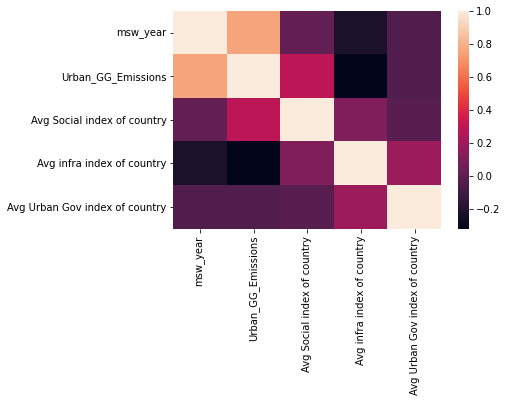

In [27]:
# Correlation between all the Parameters  
# if it is positive, the two variables tend to be high or low together
# If it is negative, the two variables tend to be opposite of each other
corr = SP_variable.corr()
# Correlation Plot
sns.heatmap(corr)

In [28]:
# Correlation Values of all the Features with respect to Target Variable 
## Top Values
print (corr['Urban_GG_Emissions'].sort_values(ascending=False)[:10], '\n')


Urban_GG_Emissions                1.000000
msw_year                          0.762145
Avg Social index of country       0.291411
Avg Urban Gov index of country   -0.046022
Avg infra index of country       -0.319782
Name: Urban_GG_Emissions, dtype: float64 



In [29]:
# Let's scale the data 
scaled_data = SP_variable[['msw_year','Urban_GG_Emissions','Avg Social index of country', 'Avg infra index of country','Avg Urban Gov index of country']]
scaler = pp.MinMaxScaler()
col_names = list(scaled_data)
scaled_data= scaler.fit_transform(scaled_data)

# Convert back into data frame
scaled_data = pd.DataFrame(scaled_data,columns=col_names)
scaled_data

## let us add the country variable back into the dataframe


scaled_data['country'] = SP_variable['country']

scaled_data.head()

,msw_year,Urban_GG_Emissions,Avg Social index of country,Avg infra index of country,Avg Urban Gov index of country,country
0,0.101843,0.314039,0.754425,0.457479,1.000000,Australia
1,0.301710,0.015309,0.838506,0.924897,0.749347,Austria
2,0.289483,0.066966,0.322983,0.701295,0.946927,Belgium
3,0.633525,0.414086,0.883587,0.209805,0.558367,Canada
4,0.068032,0.007020,0.880180,0.615564,0.924515,Denmark


## Though the dataset has reduced to double digit, it appears promising to try creating a composite variable! Giving equal weightage to each of the parameter, the variable will be tried. 

In [30]:
scaled_data['Sustanability variable'] = scaled_data.mean(axis=1)

scaled_data.head()

,msw_year,Urban_GG_Emissions,Avg Social index of country,Avg infra index of country,Avg Urban Gov index of country,country,Sustanability variable
0,0.101843,0.314039,0.754425,0.457479,1.000000,Australia,0.525557
1,0.301710,0.015309,0.838506,0.924897,0.749347,Austria,0.565954
2,0.289483,0.066966,0.322983,0.701295,0.946927,Belgium,0.465531
3,0.633525,0.414086,0.883587,0.209805,0.558367,Canada,0.539874
4,0.068032,0.007020,0.880180,0.615564,0.924515,Denmark,0.499062


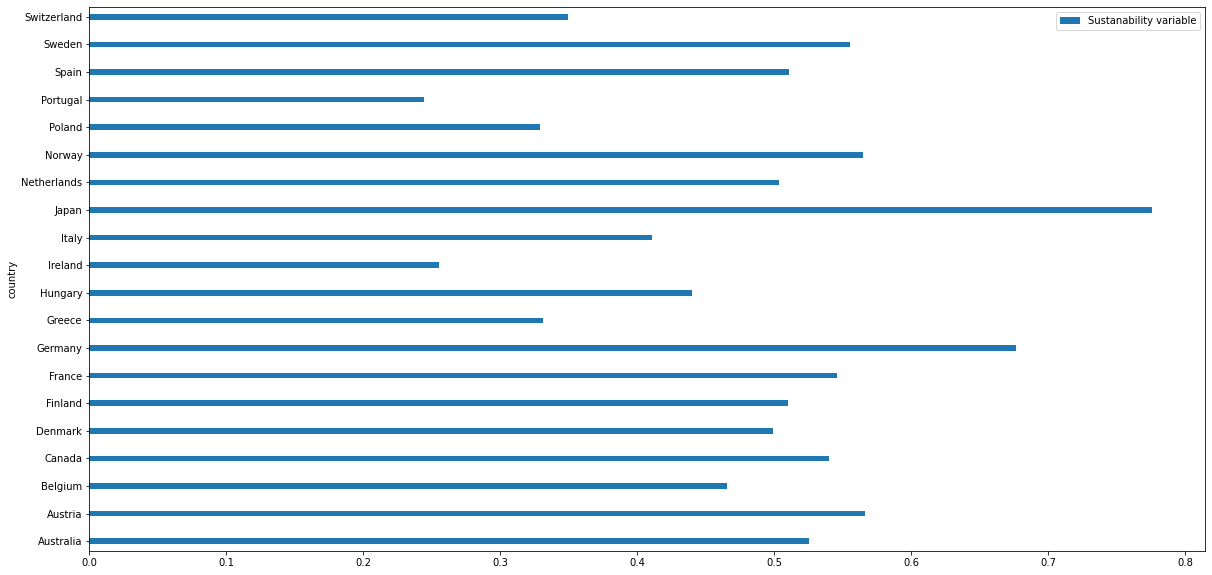

In [39]:
scaled_data.plot.barh(x='country', y=['Sustanability variable'], width=0.2, figsize=(20,10))

In [ ]:
scaled_data.to_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Project Part -1/Processed data - part 1/sustainability_variable.csv", sep=',',index=False)